<a href="https://colab.research.google.com/github/NikitaSyatov/MO_HW_2024/blob/main/MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

Загрузка датасета

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MO/Dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

Датасет содержит статистику по клиентам банка и тем, кто отказался от услуг банка. Будет решаться задача классификации: найти функциональную зависимость между характеристиками клиента и его решением оставаться клиентов банка или нет.

Description:
- Surname : Label Encoded Surnames
- Surname_tfidf_0-4 : Features made by applying TFIDF Vectorizer to the Surnames
- Credit Score : A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)
- Germany, France, Spain: One Hot Encoded Geography feature
- Male, Female: One Hot Encoded Gender feature
- Mem__no__Products: NumOfProducts * IsActiveMember
- Cred_Bal_Sal: (Credit Score * Balance) / EstimatedSalary
- Bal_sal: Balance / EstimatedSalary
- Tenure_Age: Tenure / Age
- Age_Tenure_product: Age * Tenure

Удаление пустых строк:

In [3]:
df.dropna(inplace=True)

Вид датасета:

In [4]:
df.head(20)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
5,984,588.0,36.0,4.0,131778.58,1.0,1,0,136024.31,1,...,0,1,0,0,1,0.0,569.646742,0.968787,0.111111,144.0
6,436,593.0,30.0,8.0,144772.69,1.0,1,0,29792.11,0,...,1,0,0,1,0,0.0,2881.642326,4.859431,0.266667,240.0
7,543,678.0,37.0,1.0,138476.41,1.0,1,0,106851.60,0,...,0,0,1,0,1,0.0,878.667292,1.295969,0.027027,37.0
8,1669,676.0,43.0,4.0,0.00,2.0,1,0,142917.13,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.093023,172.0
9,427,583.0,40.0,4.0,81274.33,1.0,1,1,170843.07,0,...,0,1,0,0,1,1.0,277.347711,0.475725,0.100000,160.0


Число строк в датасете:

In [5]:
count_row = df.shape[0]
count_row

175028

Соотношение классов:

In [6]:
count_churn = df["Exited"].value_counts()

count_churn = count_churn / count_row

count_churn

,count
Exited,
0,0.788851
1,0.211149


Классы несбалансированные. Ушедших из банка клиентов меньше.

Среднее по столбцам:

In [7]:
middles = df.mean()
middles

,0
Surname,1617.462812
CreditScore,656.113068
Age,38.171337
Tenure,5.019968
Balance,56676.772103
NumOfProducts,1.553072
HasCrCard,0.751183
IsActiveMember,0.498754
EstimatedSalary,111863.295024
Exited,0.211149


Стандартное отклонение по столбцам:

In [8]:
sigmas = df.std()
sigmas

,0
Surname,813.852174
CreditScore,81.148273
Age,8.969565
Tenure,2.811155
Balance,62982.418525
NumOfProducts,0.549212
HasCrCard,0.432329
IsActiveMember,0.500000
EstimatedSalary,50815.118428
Exited,0.408125


# Проверим данные на выбросы

Функция подсчета выбросов

In [9]:
def outliers_indices(feature):
    '''
    Будем считать выбросами все точки, выходящие за пределы трёх сигм.
    '''

    return df[(df[feature] < middles[feature] - 3*sigmas[feature]) | (df[feature] > middles[feature] + 3*sigmas[feature])].index

### Кредитный рейтинг

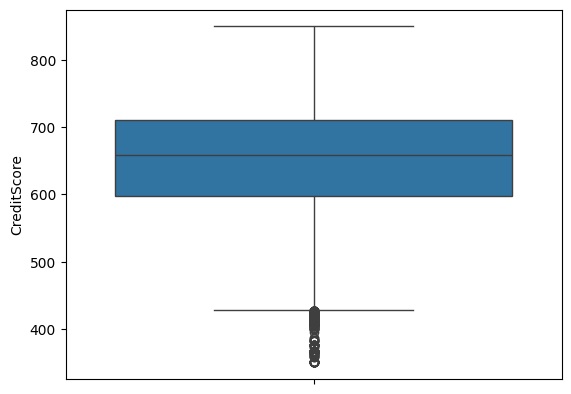

In [10]:
sns.boxplot(df['CreditScore']);

Выбросы есть, получим индексы этих строк:

In [11]:
indexes_wrong_CreditScore = outliers_indices("CreditScore")
print(len(indexes_wrong_CreditScore));

149


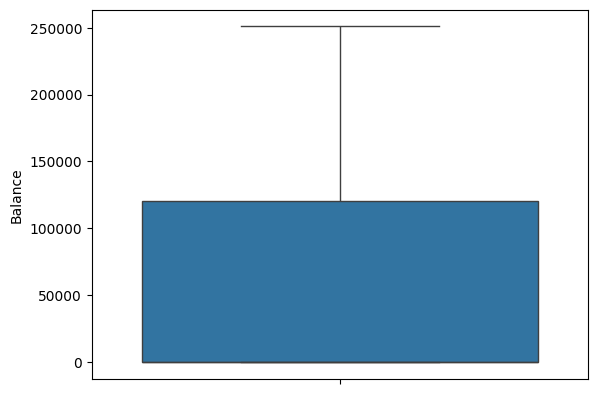

In [12]:
sns.boxplot(df['Balance']);

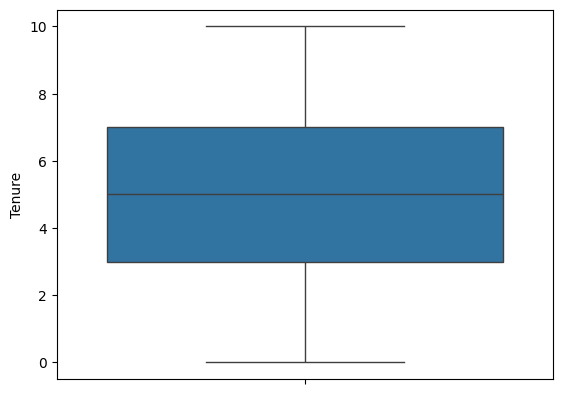

In [13]:
sns.boxplot(df['Tenure']);

### Возраст

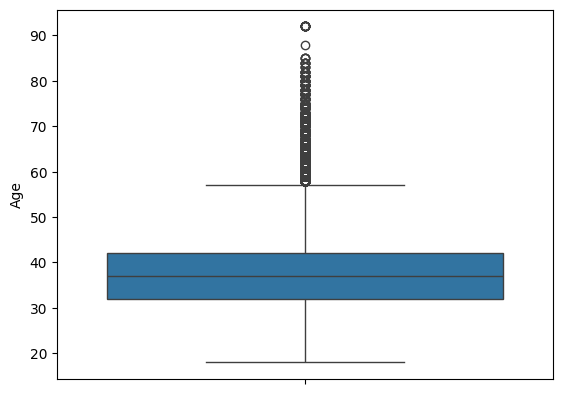

In [14]:
sns.boxplot(df['Age']);

Судя по ящику с усами есть выбросы. Посмотрим возраст самых взрослых клиентов:

Минимальный возраст клиента:

In [15]:
np.min(df['Age'])

18.0

In [16]:
print(df[df['Age'] > 85]['Age'])

17173     92.0
43508     92.0
59479     92.0
62569     92.0
74699     92.0
116359    92.0
121560    92.0
136841    92.0
162163    92.0
163138    92.0
164009    92.0
167488    88.0
171473    92.0
171789    92.0
Name: Age, dtype: float64


Буду считать, что в банке могут быть клиенты старше 90 лет. Логически, такое возможно.

### Количество продуктов банка

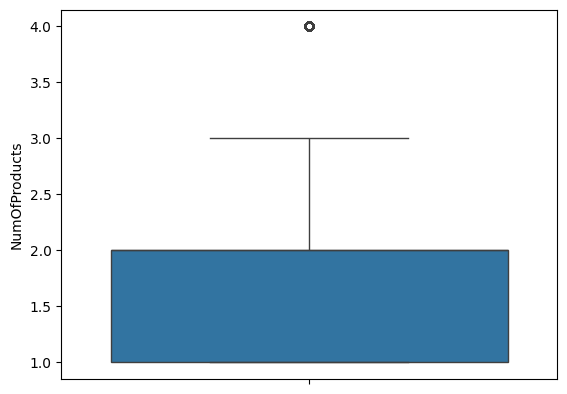

In [17]:
sns.boxplot(df['NumOfProducts']);

In [18]:
print(df[df['NumOfProducts'] >= 4]['NumOfProducts'])

182       4.0
223       4.0
1030      4.0
1257      4.0
1590      4.0
         ... 
174353    4.0
174400    4.0
174441    4.0
174570    4.0
174595    4.0
Name: NumOfProducts, Length: 535, dtype: float64


535 человек имеют 4 продукта в банке(т. е. кредитки, дебетовые карты, вклады и т. д.). Хотя по диаграмме видно сильное отклонение от среднего, всё же это нельзя назвать полноценным выбросом, так как вполне возможно, что есть люди у которых есть кредиты и несколько вкладов.

### Предполагаемые доходы

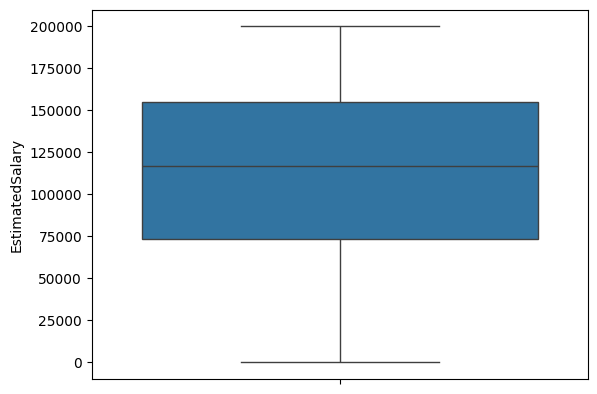

In [19]:
sns.boxplot(df['EstimatedSalary']);

### Метрика Mem__no__Products: NumOfProducts * IsActiveMember

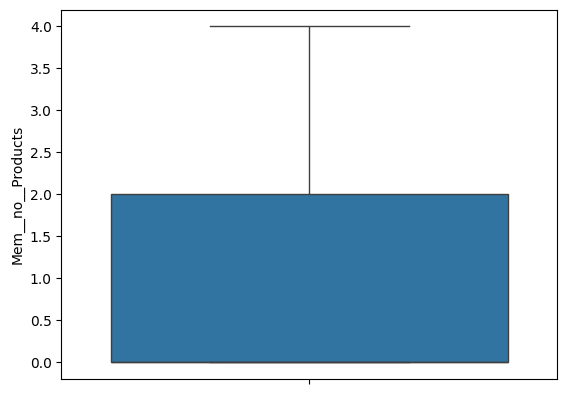

In [20]:
sns.boxplot(df['Mem__no__Products']);

### Метрика Cred_Bal_Sal: (Credit Score * Balance) / EstimatedSalary

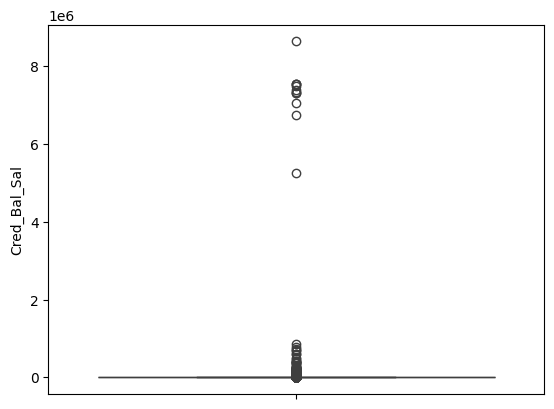

In [21]:
sns.boxplot(df['Cred_Bal_Sal']);

In [22]:
wrong_Cred_Bal_Sal = outliers_indices('Cred_Bal_Sal')

print(len(df.iloc[wrong_Cred_Bal_Sal]))

60


### Метрика Bal_sal: Balance / EstimatedSalary

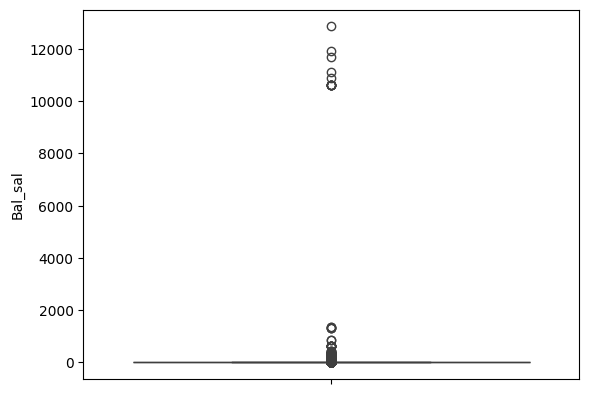

In [23]:
sns.boxplot(df['Bal_sal']);

In [24]:
wrong_Bal_Sal = outliers_indices('Cred_Bal_Sal')

print(len(df.iloc[wrong_Cred_Bal_Sal]))

60


### Метрика Tenure_Age: Tenure / Age

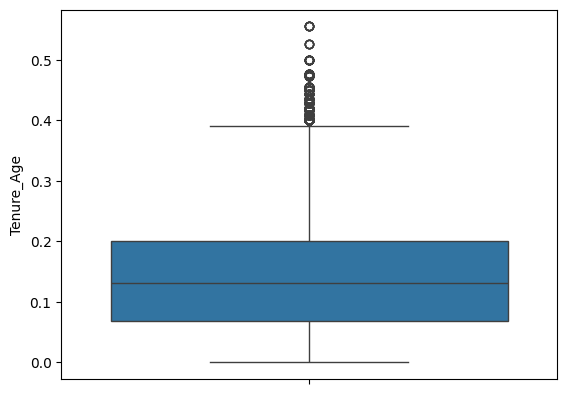

In [25]:
sns.boxplot(df['Tenure_Age']);

In [26]:
wrong_Bal_Sal = outliers_indices('Tenure_Age')

# df.iloc[wrong_Cred_Bal_Sal]
df[df['Tenure_Age'] >= 0.3]

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
47,1335,685.0,31.0,10.0,122449.31,2.0,1,1,180769.55,0,...,0,0,1,0,1,2.0,464.003906,0.677378,0.322581,310.0
73,2415,721.0,30.0,9.0,0.00,2.0,1,1,177747.05,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.300000,270.0
85,1081,622.0,29.0,9.0,0.00,2.0,1,1,155786.39,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.310345,261.0
87,1262,775.0,20.0,6.0,109026.60,1.0,1,1,120801.65,0,...,1,0,0,1,0,1.0,699.457458,0.902526,0.300000,120.0
95,2389,588.0,30.0,10.0,126683.40,1.0,1,1,131636.55,0,...,0,1,0,0,1,1.0,565.875049,0.962373,0.333333,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174917,1673,684.0,24.0,8.0,143582.89,1.0,1,1,22527.27,0,...,0,0,1,0,1,1.0,4359.635977,6.373737,0.333333,192.0
174918,2539,637.0,21.0,10.0,125712.20,1.0,0,0,175072.47,0,...,1,0,0,1,0,0.0,457.402991,0.718058,0.476190,210.0
174937,1756,481.0,28.0,10.0,0.00,2.0,1,0,145215.96,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.357143,280.0
174962,899,677.0,18.0,8.0,134796.87,2.0,1,1,114858.90,0,...,0,0,1,0,1,2.0,794.518152,1.173587,0.444444,144.0


Невозможно, чтобы 21 летний клиент уже был клиентом банка 10 лет! Это точно выбросы

### Метрика Age_Tenure_product: Age * Tenure

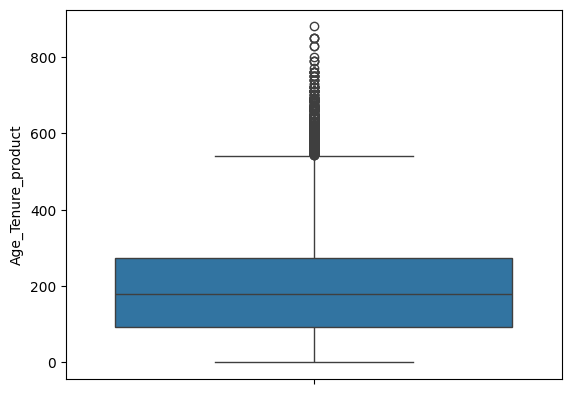

In [27]:
sns.boxplot(df['Age_Tenure_product']);

In [28]:
wrong_Age_Tenure_product = outliers_indices('Age_Tenure_product')

len(wrong_Age_Tenure_product)

936

## Удаление найденных выбросов:

In [29]:
out = set(wrong_Age_Tenure_product) | set(wrong_Bal_Sal) | set(wrong_Cred_Bal_Sal) | set(indexes_wrong_CreditScore)

len(out)

1765

Всего будет удалено 1765 строки из 175028 строк. Это не будет влиять на общий размер выборки а также на решение задачи

In [30]:
df.drop(out, inplace=True)

# Построение матрицы корреляций

Выбор столбцов, являющихся числовыми характеристиками(не учитываем фамилии и категориальные признаки)

In [31]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance',
           'EstimatedSalary', 'Mem__no__Products', 'Cred_Bal_Sal',
           'Bal_sal', 'Tenure_Age', 'Age_Tenure_product']

Построение матрицы корреляций Спирмена:

In [32]:
# sns.pairplot(df[numeric]);

### Градиентная корреляционная матрица

In [33]:
df[numeric].corr(method='spearman')

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
CreditScore,1.000000,-0.011745,0.000953,0.004826,-0.000039,0.015581,0.056604,0.005034,0.004206,-0.002434
Age,-0.011745,1.000000,-0.013961,0.064918,-0.000522,-0.048731,0.065141,0.065663,-0.318850,0.295562
Tenure,0.000953,-0.013961,1.000000,-0.009417,0.002680,-0.007459,-0.011112,-0.011078,0.937849,0.935901
Balance,0.004826,0.064918,-0.009417,1.000000,0.004535,-0.107373,0.923109,0.925267,-0.029582,0.009692
EstimatedSalary,-0.000039,-0.000522,0.002680,0.004535,1.000000,-0.007119,-0.203511,-0.209367,0.003114,0.001135
Mem__no__Products,0.015581,-0.048731,-0.007459,-0.107373,-0.007119,1.000000,-0.103129,-0.103887,0.004786,-0.016263
Cred_Bal_Sal,0.056604,0.065141,-0.011112,0.923109,-0.203511,-0.103129,1.000000,0.996271,-0.031280,0.008460
Bal_sal,0.005034,0.065663,-0.011078,0.925267,-0.209367,-0.103887,0.996271,1.000000,-0.031394,0.008642
Tenure_Age,0.004206,-0.318850,0.937849,-0.029582,0.003114,0.004786,-0.031280,-0.031394,1.000000,0.770198
Age_Tenure_product,-0.002434,0.295562,0.935901,0.009692,0.001135,-0.016263,0.008460,0.008642,0.770198,1.000000


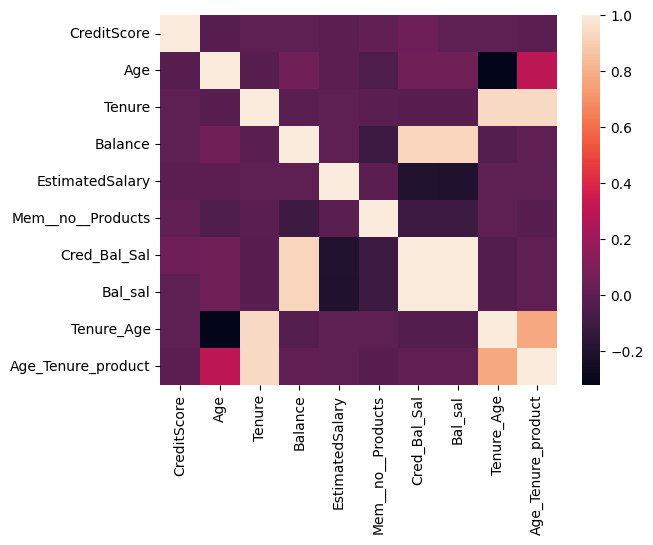

In [34]:
sns.heatmap(df[numeric].corr(method='spearman'));

Для категориальных признаков нельзя использовать предыдущие методы. Для анализа важный категориальный признак - перестал ли клиент пользоваться банков, потому что именно поэтому признаку будем классифицировать данные. Посмотрим корреляцию предыдущих признаков с категорией остался/ушел ли клиент.

In [35]:
corr, p_value = pointbiserialr(df['Exited'], df['CreditScore'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: -0.02643427297615198, p-значение: 3.612116300821835e-28


Так как p-value < 0.05 (типичное пороговое значение), то делаем вывод о том, что взаимосвязь (корреляция) класса ушедших клиентов и кредитной оценки статистически значима.

In [36]:
corr, p_value = pointbiserialr(df['Exited'], df['Age'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.3441509467474756, p-значение: 0.0


In [55]:
corr, p_value = pointbiserialr(df['Exited'], df['Male'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: -0.14393314518922842, p-значение: 0.0


In [56]:
corr, p_value = pointbiserialr(df['Exited'], df['Female'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.14393314518922842, p-значение: 0.0


p-value = 0, то есть возраст сильно коррелируется с категориальным признаком

In [37]:
corr, p_value = pointbiserialr(df['Exited'], df['Tenure'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: -0.020576765193240754, p-значение: 1.0723745634965713e-17


Взаимосвязь статистически значима

In [38]:
corr, p_value = pointbiserialr(df['Exited'], df['Balance'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.12836604178312847, p-значение: 0.0


Сильная взаимосвязь

In [39]:
corr, p_value = pointbiserialr(df['Exited'], df['EstimatedSalary'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.018788307340324023, p-значение: 5.230433755786142e-15


Взаимосвязь статистически значима

In [40]:
corr, p_value = pointbiserialr(df['Exited'], df['Mem__no__Products'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: -0.22754958154195928, p-значение: 0.0


Взаимосвязь статистически значима

In [41]:
corr, p_value = pointbiserialr(df['Exited'], df['Cred_Bal_Sal'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.022257327851476973, p-значение: 1.9386515709336378e-20


Взаимосвязь статистически значима

In [42]:
corr, p_value = pointbiserialr(df['Exited'], df['Bal_sal'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.02270945802912786, p-значение: 3.2633062323662643e-21


Взаимосвязь статистически значима, но связь слабая



In [43]:
corr, p_value = pointbiserialr(df['Exited'], df['Tenure_Age'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: -0.13005306874255246, p-значение: 0.0


Взаимосвязь статистически значима, но кореляция слабо выражена, значит, влияние не сильное

In [44]:
corr, p_value = pointbiserialr(df['Exited'], df['Age_Tenure_product'])
print(f'Корреляция: {corr}, p-значение: {p_value}')

Корреляция: 0.1067916210138852, p-значение: 0.0


## Нормализация

Для задачи классификации нормализация поможет сделать модель более устойчивая, так как методы обучения будут основаны на расстояниях, а без нормализации значения могут сильно отличаться

### Min Max нормализация

In [45]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [46]:
df = pd.DataFrame(data, columns=df.columns)

In [47]:
df.head(20)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,0.690208,0.583524,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907242,0.0,...,1.0,0.0,0.0,0.0,1.0,0.00,0.000000,0.000000,0.232323,0.181319
1,0.690549,0.489703,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247188,0.0,...,1.0,0.0,0.0,0.0,1.0,0.50,0.000000,0.000000,0.077441,0.060440
2,0.421699,0.606407,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924334,0.0,...,1.0,0.0,0.0,0.0,1.0,0.00,0.000000,0.000000,0.638889,0.732601
3,0.464688,0.384439,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422560,0.0,...,1.0,0.0,0.0,0.0,1.0,0.25,0.005576,0.005037,0.150327,0.124542
4,0.167520,0.693364,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.074930,0.0,...,0.0,0.0,1.0,0.0,1.0,0.50,0.000000,0.000000,0.387205,0.302198
5,0.335722,0.400458,0.243243,0.4,0.525228,0.000000,1.0,0.0,0.680003,1.0,...,0.0,1.0,0.0,0.0,1.0,0.00,0.003105,0.002772,0.283951,0.263736
6,0.148755,0.411899,0.162162,0.8,0.577018,0.000000,1.0,0.0,0.148583,0.0,...,1.0,0.0,0.0,1.0,0.0,0.00,0.015707,0.013903,0.681481,0.439560
7,0.185261,0.606407,0.256757,0.1,0.551923,0.000000,1.0,0.0,0.534068,0.0,...,0.0,0.0,1.0,0.0,1.0,0.00,0.004789,0.003708,0.069069,0.067766
8,0.569430,0.601831,0.337838,0.4,0.000000,0.333333,1.0,0.0,0.714484,0.0,...,1.0,0.0,0.0,0.0,1.0,0.00,0.000000,0.000000,0.237726,0.315018
9,0.145684,0.389016,0.297297,0.4,0.323934,0.000000,1.0,1.0,0.854182,0.0,...,0.0,1.0,0.0,0.0,1.0,0.25,0.001512,0.001361,0.255556,0.293040


## Разделение на тестовую и обучающую выборки

Тестовая выборка - 20%

In [89]:
numeric = ['CreditScore', 'Age', 'Balance',
           'EstimatedSalary', 'Mem__no__Products',
           'Male']

X = df[numeric] # Признаки
y = df["Exited"] # целевая функция

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Вывод полученных выборок:

In [49]:
print("Обучающая выборка:", y_train.value_counts())
print("Тестовая выборка:", y_test.value_counts())

Обучающая выборка: Exited
0    109385
1     29225
Name: count, dtype: int64
Тестовая выборка: Exited
0    27347
1     7306
Name: count, dtype: int64


## Метод К ближайших соседей

Построение графика

In [50]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    print(X.columns[feature_indexes])
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train.iloc[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf, scatter_kwargs={'s': 10})
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.axis([0, 1, 0, 1])
    plt.title(title)

In [51]:
# sk_knn_clf = KNeighborsClassifier()
# sk_knn_clf.fit(X_train, y_train)
# sk_knn_clf_pred_res = sk_knn_clf.predict(X_test)
# sk_knn_clf_accuracy = accuracy_score(y_test, sk_knn_clf_pred_res)

# print(f'sk KNN classifier accuracy: {sk_knn_clf_accuracy:}')
# print(sk_knn_clf_pred_res)

# feature_indexes = [7, 8]
# title1 = 'KNeighborsClassifier surface'
# decision_boundary_plot(X, y, X_train, y_train, sk_knn_clf, feature_indexes, title1)

In [74]:
sk_knn_reg = KNeighborsRegressor()
sk_knn_reg.fit(X_train, y_train)
sk_knn_reg_pred_res = sk_knn_reg.predict(X_test)

sk_knn_reg_r2 = r2_score(y_test, sk_knn_reg_pred_res)

print(f'sk KNN regressor R2 score: {sk_knn_reg_r2}')
print(sk_knn_reg_pred_res)


sk KNN regressor R2 score: 0.19546323711412483
[0.  0.2 0.  ... 0.  0.6 0.2]


Модель не выдает при изменении характеристик прирост больше 0.2. Можно попробовать логистическую регрессию

In [90]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8203618734308717


У логистической регрессии на  тестовой выборке лучший полученный результат - 82%